#### Prepare data

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt


In [81]:

df = pd.read_pickle("../data/token_scores.pkl")
df

,passage,gpt_labels_refs_bool,passage_tokens,diag_sep_passage,gpt_refs,gt_labels_refs_bool,att_rollout,grad_sam_scores,att_cat_scores,mean_att_all,mean_att_last_layer,gpt_labels_refs,gt_labels_refs
0,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0143), tensor(0.0026), tensor(0.0036...","[tensor(4.3173e-06), tensor(2.4501e-06), tenso...","[tensor(-0.0008), tensor(-0.0001), tensor(-0.0...","[tensor(0.0101), tensor(0.0083), tensor(0.0085...","[tensor(0.0412), tensor(0.0360), tensor(0.0390...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None
1,Pay insurance lapse civil penalty // Pay ins...,"[True, True, True, True, True, False, False, T...","[Pay, insurance, lapse, civil, penalty, /, /, ...",My insurance ended so what should i do[SEP]Pay...,[{'ref_span': 'Pay insurance lapse civil penal...,None,"[tensor(0.0112), tensor(0.0089), tensor(0.0070...","[tensor(4.5446e-06), tensor(3.7075e-06), tenso...","[tensor(-0.0013), tensor(-0.0003), tensor(0.00...","[tensor(0.0054), tensor(0.0047), tensor(0.0044...","[tensor(0.0258), tensor(0.0424), tensor(0.0189...","[tensor(1.), tensor(1.), tensor(1.), tensor(1....",None
2,Top 5 DMV Mistakes and How to Avoid Them // ...,"[False, False, False, False, False, False, Fal...","[Top, 5, DMV, Mistakes, and, How, to, Avoid, T...",My insurance ended so what should i do[SEP]Top...,[{'ref_span': 'Make sure you turn in your vehi...,"[False, False, False, False, False, False, Fal...","[tensor(0.0085), tensor(0.0022), tensor(0.0022...","[tensor(2.0746e-06), tensor(1.7868e-06), tenso...","[tensor(-0.0006), tensor(0.0002), tensor(-0.00...","[tensor(0.0102), tensor(0.0102), tensor(0.0110...","[tensor(0.0398), tensor(0.0330), tensor(0.0285...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor..."
3,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0238), tensor(0.0064), tensor(0.0090...","[tensor(1.0645e-06), tensor(7.3783e-07), tenso...","[tensor(-0.0003), tensor(-8.0363e-05), tensor(...","[tensor(0.0118), tensor(0.0143), tensor(0.0076...","[tensor(0.0743), tensor(0.0409), tensor(0.0729...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None
4,Insurance lapses // What will happen if I dr...,"[False, False, False, False, False, False, Fal...","[Insurance, lapses, /, /, What, will, happen, ...",My insurance ended so what should i do[SEP]Ins...,[{'ref_span': 'you could be arrested or ticket...,None,"[tensor(0.0092), tensor(0.0042), tensor(0.0041...","[tensor(1.1722e-06), tensor(1.5205e-06), tenso...","[tensor(-0.0005), tensor(-0.0001), tensor(-6.1...","[tensor(0.0144), tensor(0.0118), tensor(0.0131...","[tensor(0.0476), tensor(0.0524), tensor(0.0348...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,How to replace a registration // If your add...,"[False, False, False, False, False, False, Fal...","[How, to, replace, a, registration, /, /, If, ...",I would need to change the address and name.ag...,[{'ref_span': 'Your mailing address on DMV fil...,None,"[tensor(0.0108), tensor(0.0031), tensor(0.0027...","[tensor(9.7100e-07), tensor(8.4490e-07), tenso...","[tensor(-3.4392e-05), tensor(-9.2082e-05), ten...","[tensor(0.0087), tensor(0.0087), tensor(0.0084...","[tensor(0.0130), tensor(0.0145), tensor(0.0157...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None
1037,Replace license or permit // Replace at an o...,"[False, False, False, False, False, False, Tru...","[Replace, license, or, permit, /, /, Replace, ...",I would need to change the addre

In [82]:
df["gpt_any_refs"] = df["gpt_labels_refs_bool"].apply(lambda x: any(x))
df["gpt_any_refs"].value_counts()

df.drop(df[df["gpt_any_refs"] == False].index, inplace=True)
df

,passage,gpt_labels_refs_bool,passage_tokens,diag_sep_passage,gpt_refs,gt_labels_refs_bool,att_rollout,grad_sam_scores,att_cat_scores,mean_att_all,mean_att_last_layer,gpt_labels_refs,gt_labels_refs,gpt_any_refs
0,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0143), tensor(0.0026), tensor(0.0036...","[tensor(4.3173e-06), tensor(2.4501e-06), tenso...","[tensor(-0.0008), tensor(-0.0001), tensor(-0.0...","[tensor(0.0101), tensor(0.0083), tensor(0.0085...","[tensor(0.0412), tensor(0.0360), tensor(0.0390...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None,True
1,Pay insurance lapse civil penalty // Pay ins...,"[True, True, True, True, True, False, False, T...","[Pay, insurance, lapse, civil, penalty, /, /, ...",My insurance ended so what should i do[SEP]Pay...,[{'ref_span': 'Pay insurance lapse civil penal...,None,"[tensor(0.0112), tensor(0.0089), tensor(0.0070...","[tensor(4.5446e-06), tensor(3.7075e-06), tenso...","[tensor(-0.0013), tensor(-0.0003), tensor(0.00...","[tensor(0.0054), tensor(0.0047), tensor(0.0044...","[tensor(0.0258), tensor(0.0424), tensor(0.0189...","[tensor(1.), tensor(1.), tensor(1.), tensor(1....",None,True
2,Top 5 DMV Mistakes and How to Avoid Them // ...,"[False, False, False, False, False, False, Fal...","[Top, 5, DMV, Mistakes, and, How, to, Avoid, T...",My insurance ended so what should i do[SEP]Top...,[{'ref_span': 'Make sure you turn in your vehi...,"[False, False, False, False, False, False, Fal...","[tensor(0.0085), tensor(0.0022), tensor(0.0022...","[tensor(2.0746e-06), tensor(1.7868e-06), tenso...","[tensor(-0.0006), tensor(0.0002), tensor(-0.00...","[tensor(0.0102), tensor(0.0102), tensor(0.0110...","[tensor(0.0398), tensor(0.0330), tensor(0.0285...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",True
3,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0238), tensor(0.0064), tensor(0.0090...","[tensor(1.0645e-06), tensor(7.3783e-07), tenso...","[tensor(-0.0003), tensor(-8.0363e-05), tensor(...","[tensor(0.0118), tensor(0.0143), tensor(0.0076...","[tensor(0.0743), tensor(0.0409), tensor(0.0729...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None,True
4,Insurance lapses // What will happen if I dr...,"[False, False, False, False, False, False, Fal...","[Insurance, lapses, /, /, What, will, happen, ...",My insurance ended so what should i do[SEP]Ins...,[{'ref_span': 'you could be arrested or ticket...,None,"[tensor(0.0092), tensor(0.0042), tensor(0.0041...","[tensor(1.1722e-06), tensor(1.5205e-06), tenso...","[tensor(-0.0005), tensor(-0.0001), tensor(-6.1...","[tensor(0.0144), tensor(0.0118), tensor(0.0131...","[tensor(0.0476), tensor(0.0524), tensor(0.0348...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,How to replace a registration // If your add...,"[False, False, False, False, False, False, Fal...","[How, to, replace, a, registration, /, /, If, ...",I would need to change the address and name.ag...,[{'ref_span': 'Your mailing address on DMV fil...,None,"[tensor(0.0108), tensor(0.0031), tensor(0.0027...","[tensor(9.7100e-07), tensor(8.4490e-07), tenso...","[tensor(-3.4392e-05), tensor(-9.2082e-05), ten...","[tensor(0.0087), tensor(0.0087), tensor(0.0084...","[tensor(0.0130), tensor(0.0145), tensor(0.0157...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None,True
1037,Replace license or permit // Replace at an o...,"[False, False, False, False, False, False, Tru...","[Replace, license, or, permit, /, /,

#### Show random data sample

In [83]:
from custom_data_utils import utils
from IPython.display import display, HTML

def show_highlighted_passage(record, gt_bools_label, scores_label):
    highlighted_passage = utils.create_highlighted_passage(record["passage_tokens"],
                                                        gt_bools_label,
                                                        scores_label,
                                                        'green',
                                                        'linear')
    display(HTML("\n".join(highlighted_passage)))



record_id = 66
record = df.iloc[record_id]
show_highlighted_passage(record, record["gpt_labels_refs_bool"], record["grad_sam_scores"])

#### Prepare target data

<Axes: >

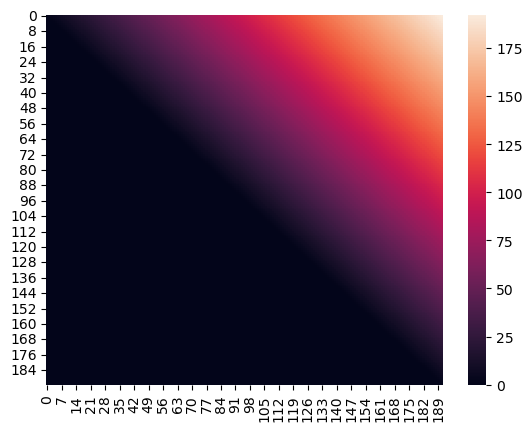

In [84]:
def calc_span_scores(a):
    a_rows = a.repeat((a.shape[-1], 1)).to(a.device)
    a_cumsum = torch.cumsum(torch.triu(a_rows), dim=-1)
    a_cumsum[a_cumsum < 0] = 0
    return a_cumsum


span_lens_default = calc_span_scores(torch.ones(record["grad_sam_scores"].size(0)))

sns.heatmap(span_lens_default)

In [85]:
# GPT generated cell: https://chatgpt.com/c/66ddca16-3830-800d-837e-4c31d36c83de
def refs_scores_to_list(refs_scores):
    # Convert the input tensor to a list for easy manipulation
    tensor_list = refs_scores.tolist()
    
    sequences = []
    temp_sequence = []
    in_sequence = False
    
    # Iterate through the tensor and identify sequences of 1
    for i, val in enumerate(tensor_list):
        if val == 1:
            if not in_sequence:
                in_sequence = True
                temp_sequence = [-1] * len(tensor_list) # Initialize a sequence with -1
            temp_sequence[i] = 1 # Mark the current position as 1 in the sequence
        elif in_sequence:
            # If a sequence ends, store it and reset
            sequences.append(temp_sequence)
            temp_sequence = []
            in_sequence = False
    
    # If we ended with a sequence, append it as well
    if in_sequence:
        sequences.append(temp_sequence)
    
    return torch.tensor(sequences)


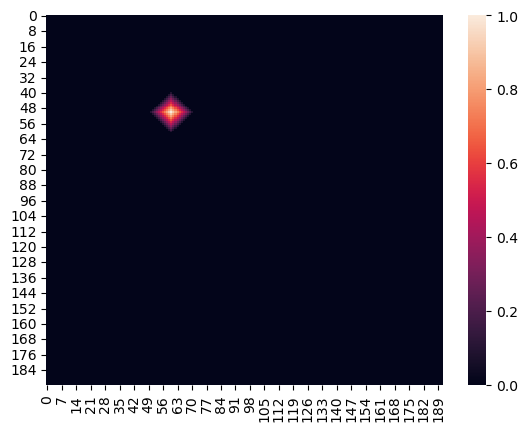

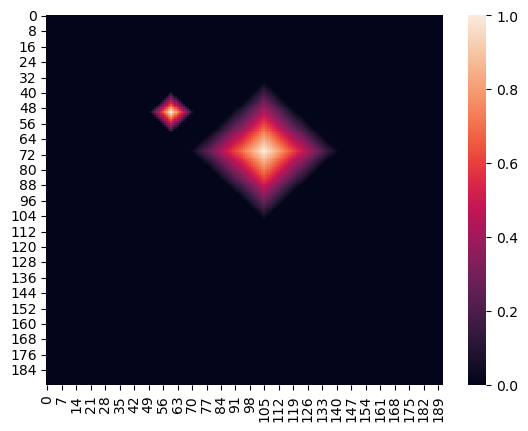

In [86]:

def count_all_refs_scoring(labels_refs_tensor, show_plts=False):
    ref_spans = refs_scores_to_list(labels_refs_tensor) 
    
    nr_tokens_row = labels_refs_tensor.size(0)
    all_refs_scores = torch.zeros((nr_tokens_row, nr_tokens_row))
    for ref_span in ref_spans:
        refs_scores = calc_span_scores(ref_span) 
        # Do not write zeroes, GT labels are not overlapping, therefore just "new set" will be written to out matrix
        all_refs_scores += refs_scores / torch.max(refs_scores)
        
        if show_plts:
            sns.heatmap(all_refs_scores)
            plt.show()
    return all_refs_scores


all_refs_scores = count_all_refs_scoring(record["gpt_labels_refs"], show_plts=True)
        

### Selecting top-k spans above matrix

In [87]:
# Find top k indexes and visualize them

def get_top_k_indexes(scores: torch.Tensor, top_k=5):
    top_k_scores, top_k_indexes = torch.topk(scores.flatten(), top_k)
    conv_ids = torch.stack(torch.unravel_index(top_k_indexes, scores.shape)).T
    # Ensure only top_k, because torch.topk returns more than k, when duplicated values
    return conv_ids[:top_k]


def get_topk_masks(scores: torch.Tensor, top_k=5):
    indexes = get_top_k_indexes(scores, top_k)
    print(indexes)
    masks = []
    for i1, i2 in indexes:
        int_mask = torch.zeros(scores.size(0))
        int_mask[i1:i2 + 1] = 1
        masks.append(int_mask)
    return masks


def show_masks(masks, tokens, boolean_gt_labels):
    for mask in masks:
        highlighted_passage = utils.create_highlighted_passage(tokens, 
                                                               boolean_gt_labels,
                                                               mask,
                                                               'green',
                                                               'linear')
        display(HTML("\n".join(highlighted_passage)))
        

masks = get_topk_masks(all_refs_scores, top_k=5)
show_masks(masks, record["passage_tokens"], record["gpt_labels_refs_bool"])


tensor([[ 70, 105],
        [ 50,  60],
        [ 69, 105],
        [ 70, 106],
        [ 70, 104]])


## Aggregating token -> span scores

tensor([[0.0039, 0.0044, 0.0041,  ..., 0.0036, 0.0036, 0.0037],
        [0.0000, 0.0048, 0.0043,  ..., 0.0035, 0.0036, 0.0036],
        [0.0000, 0.0000, 0.0036,  ..., 0.0035, 0.0035, 0.0036],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0051, 0.0042, 0.0050],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0033, 0.0049],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0065]])


<Axes: >

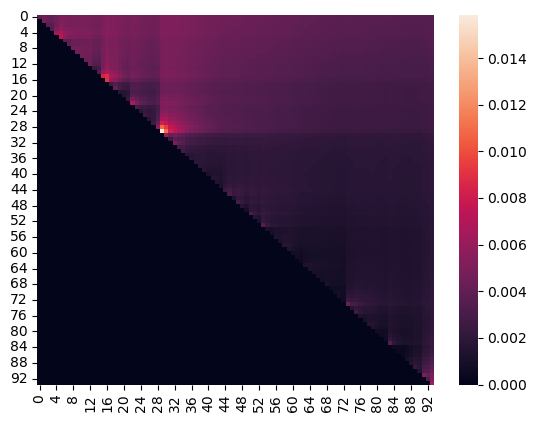

In [107]:
def span_aggregation(scores, N, K, span_lens):
    agg_scoring = scores * ((1 + N) * (span_lens + K) / span_lens)
    # posinfs are created by dividing with zero span length (under diag)
    return torch.nan_to_num(agg_scoring, posinf=0)


# [Scores * ...] formula
# - starts with (1+K)/1, (2+K)/2 ==> [13.0000,  7.0000,  5.0000,  ...,  1.1143,  1.1132,  1.1121]
# - increasing divisor makes the number smaller and smaller
# - matrix without aggregation has larger values while going right, we want to penalize larger spans more  
# - using multiplication instead of division will do the trick

N = 22
K = 250

scores = record["grad_sam_scores"]
span_lens = span_lens_default[:scores.size(0), :scores.size(0)]
grad_sam_span_scores = calc_span_scores(scores)
agg_scores = span_aggregation(grad_sam_span_scores, N, K, span_lens)
print(agg_scores)
sns.heatmap(agg_scores)


In [108]:
masks = get_topk_masks(agg_scores, top_k=5)
show_masks(masks, record["passage_tokens"], record["gpt_labels_refs_bool"])

tensor([[29, 29],
        [29, 30],
        [28, 29],
        [28, 30],
        [16, 16]])


## Parameters (N, K) optimization

In [102]:
from tqdm import tqdm

MSE = torch.nn.MSELoss()

def calc_mse(source, target):
    source = source / source.max()
    target = target / target.max()

    # Create a mask for the upper triangular part
    mask = torch.triu(torch.ones(source.shape, dtype=torch.bool))

    # Apply the mask to both matrices
    source_upper = source[mask]
    target_upper = target[mask]

    # Todo: Given that below diagonal are only zeroes, it is like to be true, that
    # mathematically equivalent operation is, to multiply MSE by number of values
    # and then divide by number of members above diagonal

    return MSE(source_upper, target_upper)

span_lens_default = calc_span_scores(torch.ones(512))

max_record_id = 100
N_range = range(1, 255, 4)
K_range = range(1, 255, 4)

In [103]:
mse_scores_tensor = torch.zeros((max_record_id, len(N_range), len(K_range)))

recalculate = True
if recalculate:
    for record_id in tqdm(range(max_record_id), "Calculating for each record"):
        record = df.iloc[record_id]
        all_refs_scores = count_all_refs_scoring(record["gpt_labels_refs"])
        scores = calc_span_scores(record["grad_sam_scores"])    
        span_lens = span_lens_default[:scores.size(0), :scores.size(0)] # Cut the span lens to the size of the scores
        
        for i, N in enumerate(N_range):
            for j, K in enumerate(K_range):
                agg_scores = span_aggregation(scores, N, K, span_lens)
                mse = calc_mse(agg_scores, all_refs_scores)
                assert mse > 0
                # Store the mse value in the tensor
                mse_scores_tensor[record_id, i, j] = mse
                
    mean_mse_scores = torch.mean(mse_scores_tensor, dim=0)
    print(mse_scores_tensor)
    
    torch.save(mean_mse_scores, "../data/mean_mse_scores.pt")


Calculating for each record: 100%|██████████| 100/100 [02:58<00:00,  1.79s/it]

tensor([[[0.1350, 0.1456, 0.1567,  ..., 0.0488, 0.0486, 0.0484],
         [0.1350, 0.1456, 0.1567,  ..., 0.0488, 0.0486, 0.0484],
         [0.1350, 0.1456, 0.1567,  ..., 0.0488, 0.0486, 0.0484],
         ...,
         [0.1350, 0.1456, 0.1567,  ..., 0.0488, 0.0486, 0.0484],
         [0.1350, 0.1456, 0.1567,  ..., 0.0488, 0.0486, 0.0484],
         [0.1350, 0.1456, 0.1567,  ..., 0.0488, 0.0486, 0.0484]],

        [[0.1555, 0.1842, 0.2223,  ..., 0.2040, 0.2039, 0.2037],
         [0.1555, 0.1842, 0.2223,  ..., 0.2040, 0.2039, 0.2037],
         [0.1555, 0.1842, 0.2223,  ..., 0.2040, 0.2039, 0.2037],
         ...,
         [0.1555, 0.1842, 0.2223,  ..., 0.2040, 0.2039, 0.2037],
         [0.1555, 0.1842, 0.2223,  ..., 0.2040, 0.2039, 0.2037],
         [0.1555, 0.1842, 0.2223,  ..., 0.2040, 0.2039, 0.2037]],

        [[0.0906, 0.0939, 0.0974,  ..., 0.0116, 0.0115, 0.0115],
         [0.0906, 0.0939, 0.0974,  ..., 0.0116, 0.0115, 0.0115],
         [0.0906, 0.0939, 0.0974,  ..., 0.0116, 0.0115, 0.

torch.Size([64, 64])


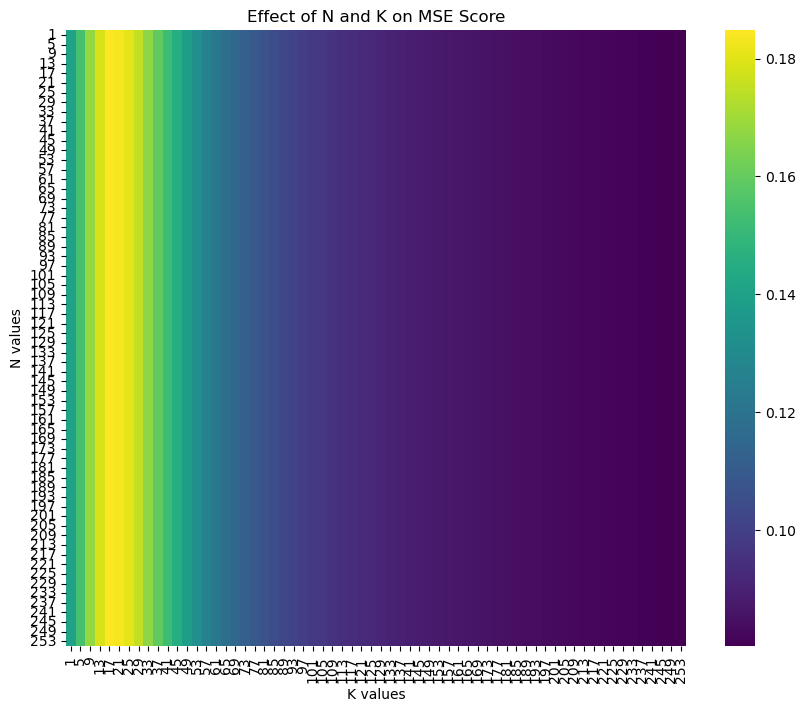

In [104]:
import torch
import seaborn as sns
from matplotlib import pyplot as plt


mean_mse_scores = torch.load("../data/mean_mse_scores.pt")
print(mean_mse_scores.shape)

# Step 2: Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(mean_mse_scores, xticklabels=K_range, yticklabels=N_range, cmap="viridis")

# Step 3: Set axis labels and title
plt.xlabel('K values')
plt.ylabel('N values')
plt.title('Effect of N and K on MSE Score')

# Show the plot
plt.show()

In [93]:
pass